In [ ]:
## Unsupervised Learning (Ch 4)

In [2]:
## K-mean 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

([], <a list of 0 Text yticklabel objects>)

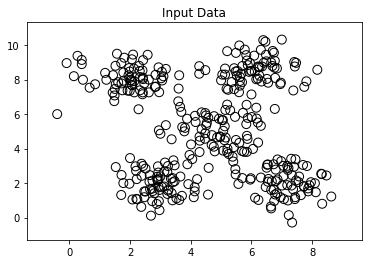

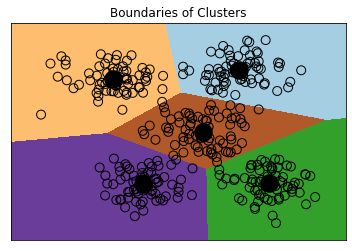

In [42]:
# Open data
input_data = open('C:/Users/Peyman/Desktop/Python - Practices/data_clustering.txt', 'r')
X = np.loadtxt(input_data, delimiter = ',')

# number of clusters
num_clusters = 5

# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], marker = 'o', facecolors = 'none', edgecolors = 'black', s=80)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
plt.title('Input Data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.xticks(())
#plt.yticks(())

# Creat K-mean classifier
# init = selection algorithm (k-means++ is a smart algorithm in slecting clusters)
# n_clusters = # of clusters
# n_init = # of runs before deciding
kmeans = KMeans(init = 'k-means++', n_clusters = num_clusters, n_init = 10)

# Train the model
kmeans.fit(X)


# Define the grid of points to plot the bounderies
step_size = 0.01 # Step size of the mesh
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))


# predict output labels for the points on the grid
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

# plot the output and color each region
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf(), 
plt.imshow(output, interpolation = 'nearest', extent = (x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()), cmap = plt.cm.Paired, aspect = 'auto', origin = 'lower')
# this line plots a new frame just showing the clusters

# overlay inputpoints (on top of clusters)
plt.scatter(X[:,0], X[:,1], marker = 'o', facecolors = 'none', edgecolors = 'black', s = 80)

# Plot the centers of clusters

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = 'o', s = 210, linewidth = 4, color = 'black', zorder = 12,  facecolors = 'black')


plt.title('Boundaries of Clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(()) # if you comment these to lines then the axis numbers are removed from the plot.
plt.yticks(())







 Centers of clusters in input data =  [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]

 Number of clusters =  5


Text(0.5, 1.0, 'Clusters')

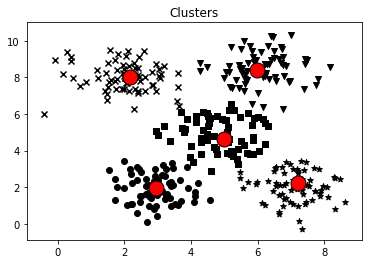

In [68]:
# Mean Shift Alg
# used for selecting optimzed number of classes

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from itertools import cycle

# Open and load data
input_data = open('C:/Users/Peyman/Desktop/Python - Practices/data_clustering.txt', 'r')
X = np.loadtxt(input_data, delimiter = ',')

# Estimate the bandwidth of X
bandwidth_X = estimate_bandwidth(X, quantile = 0.1, n_samples=len(X)) 
# quantile used to identify the bandwidth. The higher the quantile, the higher the bandwidth

# Cluster data with MeanSHift
meanshift_model = MeanShift(bandwidth = bandwidth_X, bin_seeding = True)
meanshift_model.fit(X)

# Extract the centres of clusters
cluster_centers = meanshift_model.cluster_centers_
print('\n Centers of clusters in input data = ', cluster_centers)

# Estimate the number of clusters
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('\n Number of clusters = ',num_clusters)

# Plot the points and cluster centers
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Plot points that belong to the current cluster
    plt.scatter(X[labels == i, 0], X[labels == i, 1], marker=marker, color= 'black')
    
    # Plot the cluster center
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker = 'o', markerfacecolor = 'red', markeredgecolor = 'black', markersize = 15)

plt.title('Clusters')
#plt.show() # kare khassi nemikone



 Number of clusters =  2

 Silloutte score =  0.47762624870454473

 Number of clusters =  3

 Silloutte score =  0.5471742411734871

 Number of clusters =  4

 Silloutte score =  0.5794801889687591

 Number of clusters =  5

 Silloutte score =  0.5890032635647954

 Number of clusters =  6

 Silloutte score =  0.609690411895445

 Number of clusters =  7

 Silloutte score =  0.5531506134707689

 Number of clusters =  8

 Silloutte score =  0.49648494489461825

 Number of clusters =  9

 Silloutte score =  0.472059170717576

 Optimal number of clusters =  6


([], <a list of 0 Text yticklabel objects>)

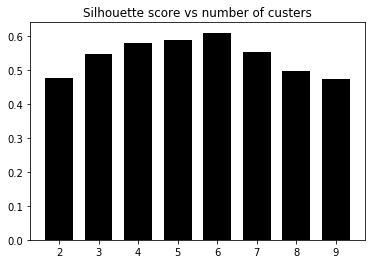

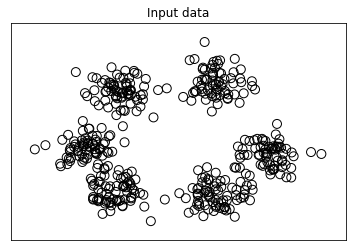

In [81]:
## Silhoutte Scores
# Estimating the qulaity of clustering is done with Silhoutte scores
# The Silloutte scores in in the range of [-1,1]; i.e., if we get negative sc means that the number of clusters are too few or too many. Then, we have to run the clustering alg. again to find the optimum numebr of clusters

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

# Load data
input_data = open('C:/Users/Peyman/Desktop/Python - Practices/data_quality.txt', 'r')
X = np.loadtxt(input_data, delimiter = ',')

# Making an array to indentify optimal number of clusters
# initialize variables
scores = []
values = np.arange(2,10) # values = [2 3 4 5 6 7 8 9]

# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init = 'k-means++', n_clusters = num_clusters, n_init = 10)
    kmeans.fit(X)
    
    # Estimate the Sillouette score
    score = metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean', sample_size = len(X))
    print("\n Number of clusters = ", num_clusters)
    print("\n Silloutte score = ",  score)
    scores.append(score)
    
# visulaize the Silhouette scores
plt.figure()
plt.bar(values, scores, width = 0.7, color = 'black', align = 'center')
plt.title("Silhouette score vs number of custers")

# Extrac best score and optimak number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\n Optimal number of clusters = ', num_clusters)

# Plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], color = 'black', s = 80, marker = 'o', facecolors = 'none')
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


TRAIN: [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST: [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 120

C:\Users\Peyman\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Peyman\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


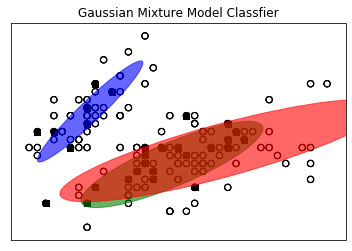

In [187]:
# Gaussian Mixture Model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold # (added to the original code)

from numpy import linalg as la
from matplotlib.patches import Ellipse

# Load the iris dataset
iris = datasets.load_iris()
#print(iris) # By looking into the iris you can see that it is a dictionary including 'data' that is the input array and 'target' that is the lable array 
#print(iris.data)
X, y = iris.data, iris.target # X and y are defined based on the input array ('data') and label array ('target')
#print(len(iris.data), len(iris.target)) #ans: 150 150
#print(X,y)

# Split dataset into training and test sets (80/20 split)
# n_splits specifies the number of subsets; the data is split into 5 parts, 4 parts are used for training and one part for test
skf = StratifiedKFold(n_splits = 5)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
# Extract the number of classes
num_classes = len(np.unique(y_train))

# Build Gaussian Mixture Model
# n_components = The number of mixture components = The number of underlying distributions = numner of distinct classes in the data
# covariance_type = full covarience type
# init_params = controls the parameters that need to be updated during training processes it has two cases 'random' and 'kmeans';i.e., responsibilities are initialized randomly or using kmeans respectively.
# max_iter = The number of Expectation-Maximization (EM) iterations to perform.
classifier = GaussianMixture(n_components = num_classes, covariance_type = 'full', init_params = 'kmeans', max_iter = 20)


# Initialize the GMM means
classifier.means_ = np.array([X_train[y_train == i].mean(axis = 0) for i in range(num_classes)])

# Train the GMM
classifier.fit(X_train)

# Visulalize the eliptical bounderies of the classifier using eigen value and eigen vectors
plt.figure()
colors = 'bgr'


for i, color in enumerate(colors):
    # Extract eigen values and eigen vectors
    eigenvalues, eigenvectors = np.linalg.eigh(classifier.covariances_[i][:2,:2])
    
    # Normalize the first eigen vector
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])
    
    # Extract the engle of tilt
    # (i.e., the ellipses need to be rotated to accurately show the distribution)
    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180* angle /np.pi
    
    # Magnify the ellipses by scalling factor
    # (random value was selected to suit our needs)
    scaling_factor = 8
    eigenvalues *= scaling_factor
    
    # Draw the ellipses
    ellipse = patches.Ellipse(classifier.means_[i, :2], eigenvalues[0], eigenvalues[1], 180+angle, color=color)
    axis_handle = plt.subplot(1,1,1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)
    
    # Overlay input data on the figure
    colors = 'bgr'
    for i, color in enumerate(colors):
        cur_data = iris.data[iris.target == i]
        plt.scatter(cur_data[:,0], cur_data[:,1], marker = 'o', facecolors = 'none', edgecolors = 'black', s = 40, label = iris.target_names[i])
        
        #Overlay test data
        test_data = X_test[y_test == i]
        plt.scatter(test_data[:,0], test_data[:,1], marker = 's', facecolors = 'black', edgecolors = 'black', s = 40, label = iris.target_names[i])
    # Compute predictions for train and test datasets
    y_train_pred = classifier.predict(X_train)
    accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel())*100
    print('Accuracy on training set = ', accuracy_training)

    y_test_pred = classifier.predict(X_test)
    accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel())*100
    print('Accuracy on training set = ', accuracy_testing)

    plt.title('Gaussian Mixture Model Classfier')
    plt.xticks(())
    plt.yticks(())
    
    #plt.show()

    
        
    
    
    
    





In [193]:
# Finding subgroups in stock market data
# Afinity Propagation 

import datetime
import json

import numpy as np
import matplotlib.pyplot as plt
from sklearn import covariance
from sklearn import cluster


from matplotlib.finance import quotes_historical_yahoo_ochl as quotes_yahoo 
# matplotlib.finance has been depricated


ModuleNotFoundError: No module named 'matplotlib.finance'


 Number of clusters in input data =  9

 Center of clusters:
Tsh	Tan	Hal	Tur	Tub	Swe
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
35314	16745	12775	66900	1298	5613
28333	34263	24065	5575	4229	18076
22617	77873	32543	1005	21035	837
14987	46397	97393	1127	37315	3235
7852	4939	63081	134	40066	1332


Text(0.5, 1.0, 'Centers of 2D Clusters')

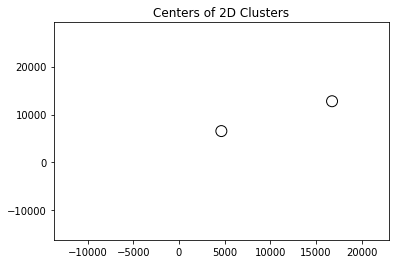

In [206]:
## Segmenting the Market Besed on Shoping Patterns

import csv # to open excel files

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# Load data
# I saved data from github of this book author (raw --> right click --> save as); It is saved as a csv file (https://raw.githubusercontent.com/PacktPublishing/Artificial-Intelligence-with-Python/master/Chapter%2004/code/sales.csv)

input_file = open('C:/Users/Peyman/Desktop/Python - Practices/sales.csv', 'r')
file_reader = csv.reader(input_file, delimiter = ',')

X = []
for count, row in enumerate (file_reader):
    if not count:
        names = row[1:]
        continue
        
    X.append([float(x) for x in row[1:]])
    
# Convert to numpy array
X = np.array(X)

# Estimating the BW of input data
bandwidth = estimate_bandwidth(X, quantile = 0.8, n_samples = len(X))

# Train a Mean Shift Model based on estimated BW
meanshift_model = MeanShift(bandwidth = bandwidth, bin_seeding = True)
meanshift_model.fit(X)

labels = meanshift_model.labels_
cluster_centers = meanshift_model.cluster_centers_
num_clusters = len(np.unique(labels))

# Print number of clusters and cluster centers
print("\n Number of clusters in input data = ", num_clusters)
print("\n Center of clusters:")
print ('\t'.join([name[:3] for name in names])) # \t for tab indent

for cluster_center in cluster_centers:
    print('\t'.join([str(int(x)) for x in cluster_center]))
    
# Extract 2 features or visualization
cluster_centers_2d = cluster_centers[:, 1:3]

# Plot cluster centers
plt.figure()
plt.scatter(cluster_centers_2d[:,0], cluster_centers_2d[:,1], s= 120, edgecolors = 'black', facecolors = 'none')

offset = 0.25
plt.xlim(cluster_centers_2d[:,0].min() - offset* cluster_centers_2d[:,0].ptp(), cluster_centers_2d[:,0].min() + offset* cluster_centers_2d[:,0].ptp())
plt.ylim(cluster_centers_2d[:,1].min() - offset* cluster_centers_2d[:,1].ptp(), cluster_centers_2d[:,1].min() + offset* cluster_centers_2d[:,1].ptp())
    
plt.title('Centers of 2D Clusters')


